Description

A data frame with 214 observation containing examples of the chemical analysis of 7 different types of glass. The problem is to forecast the type of class on basis of the chemical analysis. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence (if it is correctly identified!).

In [ ]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Dependencies

# Standard Dependencies
import os
import numpy as np
import pandas as pd
from math import sqrt

# Visualization
from pylab import *
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from statistics import median
from scipy import signal
#from scipy.misc import factorial
import scipy.stats as stats
from scipy.stats import sem, binom, lognorm, poisson, bernoulli, spearmanr
from scipy.fftpack import fft, fftshift

# Deep Learning
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD, Adam, Nadam, RMSprop, Adadelta, Adagrad, Adamax, Ftrl
from keras.constraints import maxnorm
from sklearn.preprocessing import MinMaxScaler

In [ ]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from keras.preprocessing.image import ImageDataGenerator

# About glass data
#URL: https://github.com/jbrownlee/Datasets/blob/master/glass.names

Explanation: The study of classification of types of glass was motivated by criminological investigation.  At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

In [ ]:
# Loading the dataset
df = pd.read_csv('glass.csv', names=['Refractive Index', 'Sodium', 'Magnesium', 'Aluminium',
                                    'Silicon', 'Potassium', 'Calcium', 'Barium',
                                    'Iron', 'Class'])
df

,Refractive Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# Data preprocessing

In [ ]:
#To Test if Any Values Need to Dropped
df_copy = df.copy(deep = True)
df_copy[['Refractive Index', 'Sodium', 'Magnesium', 'Aluminium',
                                    'Silicon', 'Potassium', 'Calcium', 'Barium',
                                    'Iron', 'Class']].replace(0,np.NaN) 

print(df_copy.isnull().sum())

Refractive Index    0
Sodium              0
Magnesium           0
Aluminium           0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Class               0
dtype: int64


In [ ]:
#Using standard sclae helps us to get all values centered around the mean with a unit standard deviation
from sklearn import preprocessing
sc=preprocessing.StandardScaler()

### Checking if the variables are all numeric

In [ ]:
df.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

Refractive Index    True
Sodium              True
Magnesium           True
Aluminium           True
Silicon             True
Potassium           True
Calcium             True
Barium              True
Iron                True
Class               True
dtype: bool

### Checking if the variables use a consistent scale.

In [ ]:
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Refractive Index  214 non-null    float64
 1   Sodium            214 non-null    float64
 2   Magnesium         214 non-null    float64
 3   Aluminium         214 non-null    float64
 4   Silicon           214 non-null    float64
 5   Potassium         214 non-null    float64
 6   Calcium           214 non-null    float64
 7   Barium            214 non-null    float64
 8   Iron              214 non-null    float64
 9   Class             214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# The overall statistics of the dataset

In [ ]:
df_stat = df.describe()
print ("Overall Statistics", "\n", df_stat, "\n")

Overall Statistics 
        Refractive Index      Sodium   Magnesium   Aluminium     Silicon  \
count        214.000000  214.000000  214.000000  214.000000  214.000000   
mean           1.518365   13.407850    2.684533    1.444907   72.650935   
std            0.003037    0.816604    1.442408    0.499270    0.774546   
min            1.511150   10.730000    0.000000    0.290000   69.810000   
25%            1.516523   12.907500    2.115000    1.190000   72.280000   
50%            1.517680   13.300000    3.480000    1.360000   72.790000   
75%            1.519157   13.825000    3.600000    1.630000   73.087500   
max            1.533930   17.380000    4.490000    3.500000   75.410000   

        Potassium     Calcium      Barium        Iron       Class  
count  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     0.497056    8.956963    0.175047    0.057009    2.780374  
std      0.652192    1.423153    0.497219    0.097439    2.103739  
min      0.000000    5.430000  

# A visualization of one or more of features using bar chart

array([[<AxesSubplot:title={'center':'Refractive Index'}>,
        <AxesSubplot:title={'center':'Sodium'}>,
        <AxesSubplot:title={'center':'Magnesium'}>],
       [<AxesSubplot:title={'center':'Aluminium'}>,
        <AxesSubplot:title={'center':'Silicon'}>,
        <AxesSubplot:title={'center':'Potassium'}>],
       [<AxesSubplot:title={'center':'Calcium'}>,
        <AxesSubplot:title={'center':'Barium'}>,
        <AxesSubplot:title={'center':'Iron'}>]], dtype=object)

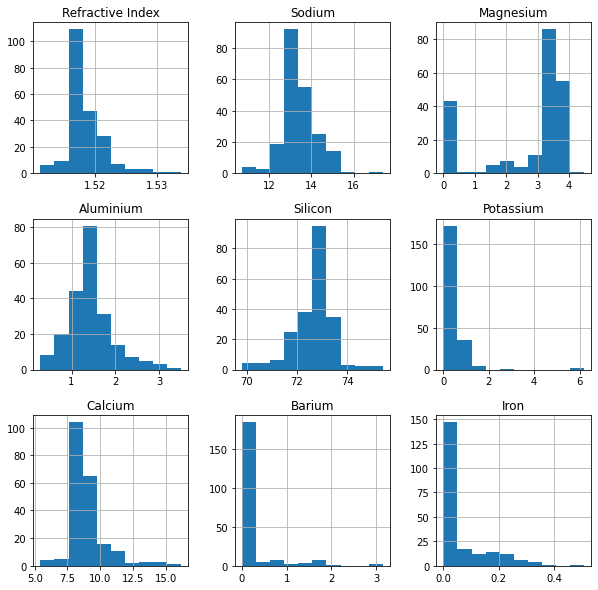

In [ ]:
# Bar chart
df[['Refractive Index', 'Sodium', 'Magnesium', 'Aluminium',
                                    'Silicon', 'Potassium', 'Calcium', 'Barium',
                                    'Iron']].hist(figsize = (10,10))

### Drop all the rows with missing values

In [ ]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df.dropna()
df

,Refractive Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# Checking for outliers

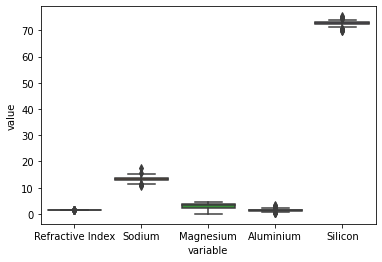

In [ ]:
df1 = pd.DataFrame(data = df, columns = ['Refractive Index', 'Sodium', 'Magnesium', 'Aluminium',
                                    'Silicon'])

sns.boxplot(x="variable", y="value", data=pd.melt(df1))

plt.show()

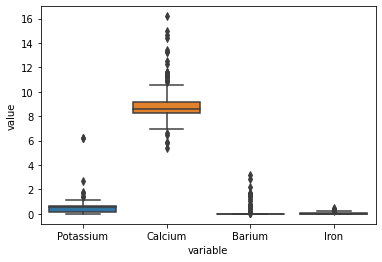

In [ ]:
# Detecting Outliers - Part 2
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df2 = pd.DataFrame(data = df, columns = [ 'Potassium', 'Calcium', 'Barium',
                                    'Iron'])

sns.boxplot(x="variable", y="value", data=pd.melt(df2))

plt.show()

In [ ]:
# Detecting Outliers
z=np.abs(stats.zscore(df))
print(z)
print(df.shape)
print("\n")
# Where the outliers are:
print(np.where(z > 3))
print("\n")
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
print("IQR range: ", "\n", lowqe_bound,"\n", upper_bound)
# Transforming Outliers
Otl_df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
print(Otl_df.shape)

[[0.87286765 0.28495326 1.25463857 ... 0.35287683 0.5864509  0.84827468]
 [0.24933347 0.59181718 0.63616803 ... 0.35287683 0.5864509  0.84827468]
 [0.72131806 0.14993314 0.60142249 ... 0.35287683 0.5864509  0.84827468]
 ...
 [0.75404635 1.16872135 1.86551055 ... 2.95320036 0.5864509  2.01047778]
 [0.61239854 1.19327046 1.86551055 ... 2.81208731 0.5864509  2.01047778]
 [0.41436305 1.00915211 1.86551055 ... 3.01367739 0.5864509  2.01047778]]
(214, 10)


(array([105, 106, 106, 106, 106, 106, 107, 107, 107, 110, 111, 112, 112,
       131, 145, 162, 163, 163, 163, 171, 171, 172, 172, 174, 184, 184,
       188, 189, 201, 201, 203, 207, 213]), array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
       5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7]))


IQR range:  
 Refractive Index     1.51257
Sodium              11.53125
Magnesium           -0.11250
Aluminium            0.53000
Silicon             71.06875
Potassium           -0.60875
Calcium              6.84125
Barium               

# Choosing a target variable

In [ ]:
x= Otl_df.iloc[:,0:9]
y= Otl_df.iloc[:,9]

In [ ]:
x.head()

,Refractive Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [ ]:
(Otl_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 212
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Refractive Index  194 non-null    float64
 1   Sodium            194 non-null    float64
 2   Magnesium         194 non-null    float64
 3   Aluminium         194 non-null    float64
 4   Silicon           194 non-null    float64
 5   Potassium         194 non-null    float64
 6   Calcium           194 non-null    float64
 7   Barium            194 non-null    float64
 8   Iron              194 non-null    float64
 9   Class             194 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.7 KB


# The accuracy of the initial DL model.

In [ ]:
#Initialize the network
scalar = MinMaxScaler()
scalar.fit(x)
x = scalar.transform(x)
model = Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#Build it
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#Train it
model.fit(x, y, epochs=5, batch_size=10)
# Evaluate it
_, accuracy = model.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100)) # We only show the accuracy
# make a prediction
Xnew = scalar.transform(x)
predictions = (model.predict(x) > 0.5).astype(int)
# show the inputs and predicted outputs

for i in range(len(x)):
	print("X=%s, Predicted=%s" % (Xnew[i].tolist(), predictions[i]))

Epoch 1/5
20/20 [==============================] - 0s 1ms/step - loss: 1.0589 - accuracy: 0.0000e+00
Epoch 2/5
20/20 [==============================] - 0s 1ms/step - loss: 0.7614 - accuracy: 0.2216
Epoch 3/5
20/20 [==============================] - 0s 1ms/step - loss: 0.6439 - accuracy: 0.3505
Epoch 4/5
20/20 [==============================] - 0s 1ms/step - loss: 0.5789 - accuracy: 0.3608
Epoch 5/5
7/7 [==============================] - 0s 2ms/step - loss: 0.5032 - accuracy: 0.3608
Accuracy: 36.08
X=[0.6085319949811776, 0.633495145631068, 1.0, 0.3127413127413128, 0.3040201005025125, 0.034090909090909095, 0.4695898161244696, 0.0, 0.0], Predicted=[1]
X=[0.3952321204517091, 0.6941747572815533, 0.8017817371937639, 0.4131274131274132, 0.542713567839197, 0.27272727272727276, 0.3394625176803394, 0.0, 0.0], Predicted=[1]
X=[0.3055207026348796, 0.6067961165048543, 0.7906458797327394, 0.48262548262548266, 0.608040201005025, 0.22159090909090912, 0.33239038189533243, 0.0, 0.0], Predicted=[1]
X=[0.

# Tunning the following hyperparameters of the DL model

In [ ]:
# Load the model
def create_model(activation='sigmoid', learn_rate=0.2, momentum=0, neurons=1, optimizer_list='adam', init_mode='uniform'):
	model = Sequential()
	model.add(Dense(neurons, input_dim=9, kernel_initializer=init_mode, activation=activation, kernel_constraint=maxnorm(4)))
	model.add(Dropout(0.5))
	model.add(Dense(12, kernel_initializer=init_mode, activation='relu'))
	model.add(Dense(8, kernel_initializer=init_mode, activation='relu'))
	model.add(Dense(1, kernel_initializer=init_mode, activation=activation))
	# Compile model
	try:
		optimizer = optimizer_list(learning_rate = learn_rate, momentum = momentum)
	except TypeError:
		optimizer = optimizer_list(learning_rate = learn_rate)
	model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [ ]:
# Creating the model
model = KerasClassifier(build_fn=create_model, epochs=50, verbose=0)
param_grid = {
    'activation': ['linear', 'sigmoid'],
    'learn_rate': [0.1, 0.2],
    'momentum': [0.1, 0.2],
    'neurons': [1, 5],
    'optimizer_list': [SGD, Adagrad],
    'init_mode': ['uniform', 'zero'],
    'epochs': [25, 35],
    'batch_size': [5, 2]
    }

# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)
# define the grid search parameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x, y)
grid_result.best_params_
grid_result.best_score_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/var/folders/ky/01nnl33d29x3sb4skx8b6d8c0000gn/T/ipykernel_5542/3891687036.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=50, verbose=0)
/var/folders/ky/01nnl33d29x3sb4skx8b6d8c0000gn/T/ipykernel_5542/3891687036.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)


Best: 0.682692 using {'activation': 'linear', 'batch_size': 5, 'epochs': 35, 'init_mode': 'uniform', 'learn_rate': 0.1, 'momentum': 0.2, 'neurons': 5, 'optimizer_list': <class 'keras.optimizer_v2.gradient_descent.SGD'>}
0.067308 (0.051482) with: {'activation': 'linear', 'batch_size': 5, 'epochs': 25, 'init_mode': 'uniform', 'learn_rate': 0.1, 'momentum': 0.1, 'neurons': 1, 'optimizer_list': <class 'keras.optimizer_v2.gradient_descent.SGD'>}
0.025641 (0.036262) with: {'activation': 'linear', 'batch_size': 5, 'epochs': 25, 'init_mode': 'uniform', 'learn_rate': 0.1, 'momentum': 0.1, 'neurons': 1, 'optimizer_list': <class 'keras.optimizer_v2.adagrad.Adagrad'>}
0.067308 (0.051482) with: {'activation': 'linear', 'batch_size': 5, 'epochs': 25, 'init_mode': 'uniform', 'learn_rate': 0.1, 'momentum': 0.1, 'neurons': 5, 'optimizer_list': <class 'keras.optimizer_v2.gradient_descent.SGD'>}
0.395433 (0.427699) with: {'activation': 'linear', 'batch_size': 5, 'epochs': 25, 'init_mode': 'uniform', 'lea